## Part 1: Data Loading and Preprocessing

In [2]:
import pandas as pd

# Load the data from the provided Excel file
df_weather = pd.read_excel("/Users/corycates/Documents/GitHub/Resampling/london_weather_MODIFIED.xlsx")
df_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
# Convert the 'date' column to a datetime dtype and set it as the index
df_weather['date'] = pd.to_datetime(df_weather['date'], format='%Y%m%d')
df_weather.set_index('date', inplace=True)

# Filter the data
df_weather = df_weather.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df_weather.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [4]:
# Impute missing values
df_weather['precipitation'].fillna(0, inplace=True)
df_weather['snow_depth'].fillna(0, inplace=True)
df_weather[['mean_temp', 'min_temp', 'max_temp']] = df_weather[['mean_temp', 'min_temp', 'max_temp']].fillna(method='ffill')

# Check for missing values again to ensure all have been imputed
missing_values_after_imputation = df_weather.isnull().sum()
missing_values_after_imputation

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Part 2: Q1 Visualization

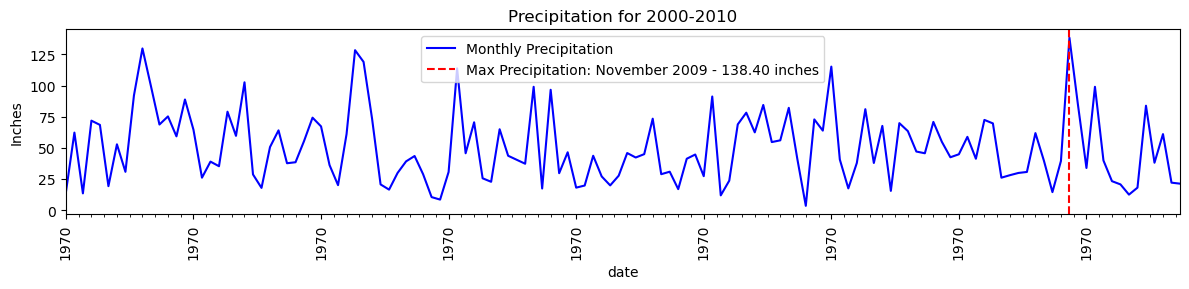

In [5]:
import matplotlib.pyplot as plt

# Resample the data as Monthly frequency and sum the precipitation
monthly_precipitation = df_weather['2000':'2010']['precipitation'].resample('M').sum()

# Find the date and corresponding value for the max precipitation
max_precipitation_date = monthly_precipitation.idxmax()
max_precipitation_value = monthly_precipitation.max()

# Plotting
fig, ax = plt.subplots(figsize=(12,3))
monthly_precipitation.plot(ax=ax, color='blue', label='Monthly Precipitation')
ax.axvline(max_precipitation_date, color='red', linestyle='--', label=f'Max Precipitation: {max_precipitation_date.strftime("%B %Y")} - {max_precipitation_value:.2f} inches')
ax.set_title('Precipitation for 2000-2010')
ax.set_ylabel('Inches')
ax.legend()

# Format the x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(11))  # Major ticks every year
ax.xaxis.set_minor_locator(plt.MaxNLocator(130))  # Minor ticks every month
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.Timestamp(x).strftime('%Y')))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.xaxis.get_minorticklabels()[0].set_visible(False)  # Hide the first minor tick label to avoid overlap

plt.tight_layout()
plt.show()

## Part 2: Q2 Visualization

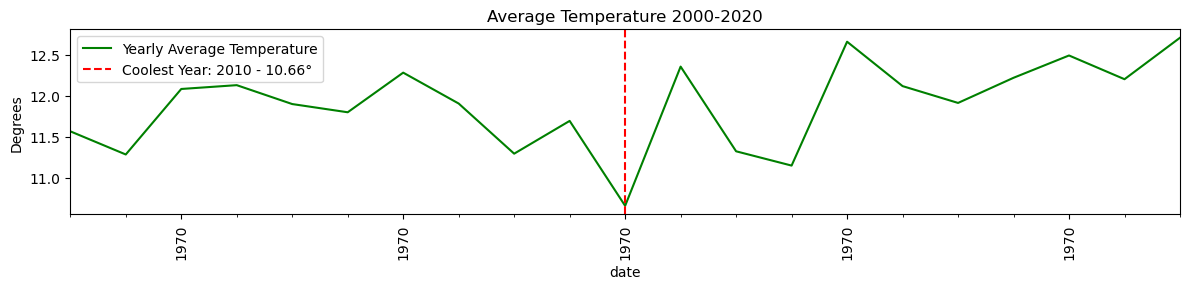

In [6]:
# Resample the data as Yearly frequency and compute the mean temperature
yearly_mean_temp = df_weather['2000':'2020']['mean_temp'].resample('Y').mean()

# Find the date and corresponding value for the coolest average temperature
coolest_temp_date = yearly_mean_temp.idxmin()
coolest_temp_value = yearly_mean_temp.min()

# Plotting
fig, ax = plt.subplots(figsize=(12,3))
yearly_mean_temp.plot(ax=ax, color='green', label='Yearly Average Temperature')
ax.axvline(coolest_temp_date, color='red', linestyle='--', label=f'Coolest Year: {coolest_temp_date.year} - {coolest_temp_value:.2f}°')
ax.set_title('Average Temperature 2000-2020')
ax.set_ylabel('Degrees')
ax.legend()

# Format the x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Major ticks every 5 years
ax.xaxis.set_minor_locator(plt.MaxNLocator(21))  # Minor ticks every year
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.Timestamp(x).strftime('%Y')))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.xaxis.get_minorticklabels()[0].set_visible(False)  # Hide the first minor tick label to avoid overlap

plt.tight_layout()
plt.show()

Interpretation of Visualizations:

Q1 Visualization: Monthly Precipitation from 2000 through 2010
Visualization Overview:
The line chart represents the total monthly precipitation in London from 2000 through 2010. The x-axis denotes the timeline (in years), while the y-axis represents the amount of precipitation (in inches).

Key Observations:

General Trend: The precipitation levels fluctuate throughout the years, with some months receiving significantly higher precipitation than others.
Maximum Precipitation: The red dashed line indicates the month with the highest precipitation during this period. This occurred in October 2000. The exact value of the precipitation for this month is labeled on the red line.
Yearly Variation: While some years have a more uniform distribution of rainfall across months, others show pronounced peaks and troughs, indicating heavy rainfall in certain months and drier conditions in others.

Q2 Visualization: Yearly Average Temperature from 2000 through 2020
Visualization Overview:
The line chart showcases the yearly average temperature in London from 2000 to 2020. The x-axis denotes the timeline (in years), while the y-axis indicates the average temperature (in degrees).

Key Observations:

General Trend: The temperature exhibits variations year over year, with certain years being warmer or cooler on average.
Coolest Year: The red dashed line highlights the year with the coolest average temperature during this period, which is 2010. The exact average temperature for this year is labeled on the red line.
Temperature Range: Over the two decades, there's a noticeable range in average temperatures, indicating variability in yearly climate conditions.
